In [20]:
import pandas as pd 
 
df_long = pd.read_csv('final_df_long.csv') 
df_new = pd.read_csv('indian population new.csv') 
df_india = pd.read_csv('india.csv') 
df_population = pd.read_csv('population.csv')
df_female = pd.read_csv('male female.csv')

In [4]:
# Display the first few rows of each dataframe 
print("final_df_long.csv:") 
print(df_long.head()) 

print("\nindian_population_new.csv:") 
print(df_new.head()) 

print("\nindia.csv:") 
print(df_india.head()) 

print("\nmale female.csv:")
print(df_female.head()) 

print("\npopulation.csv info:")
df_population.info()

# Get information about the columns and data types 
print("\nfinal_df_long.csv info:") 
df_long.info() 

final_df_long.csv:
                         State  Year  Population   Rural   Urban  Literacy  \
0  Andaman And Nicobar Islands  1951      0.0031  0.0023  0.0008     30.30   
1               Andhra Pradesh  1951      3.1115  2.5695  0.5420      0.00   
2            Arunachal Pradesh  1951      0.0200  0.0200  0.0000      0.00   
3                        Assam  1951      0.8029  0.7684  0.0345     18.53   
4                        Bihar  1951      2.9085  2.7219  0.1866     13.49   

   Sex_Ratio  
0        625  
1        986  
2          0  
3        868  
4       1000  

indian_population_new.csv:
   Year    Population % Increase in Population  Population Density  \
0  1950  35,70,21,100                    0.00%              108.61   
1  1951  36,49,22,360                    2.21%              111.01   
2  1952  37,29,97,188                    2.21%              113.47   
3  1953  38,12,27,705                    2.21%              115.97   
4  1954  38,97,31,406                    2.2

 Data Cleaning and Preprocessing

In [5]:
# Check for missing values 
print(df_long.isnull().sum()) 

# Example of filling missing values with 0 
df_long['Literacy'] = df_long['Literacy'].fillna(0) 

State         0
Year          0
Population    0
Rural         0
Urban         0
Literacy      0
Sex_Ratio     0
dtype: int64


In [6]:
df_long.drop_duplicates(inplace=True) 

Exploratory Data Analysis (EDA)

In [7]:
print(df_long['Population'].describe()) 

count    250.000000
mean       4.087118
std       13.038477
min        0.002100
25%        0.078375
50%        0.929100
75%        3.330150
max      121.085500
Name: Population, dtype: float64


In [8]:
print(df_india['Population'].describe()) 

count    5.170000e+02
mean     1.973099e+06
std      1.449796e+06
min      3.532000e+04
25%      9.584050e+05
50%      1.690400e+06
75%      2.678980e+06
max      1.106015e+07
Name: Population, dtype: float64


In [9]:
print(df_new['Population'].describe()) 

count               73
unique              73
top       35,70,21,100
freq                 1
Name: Population, dtype: object


Population Growth Over Time

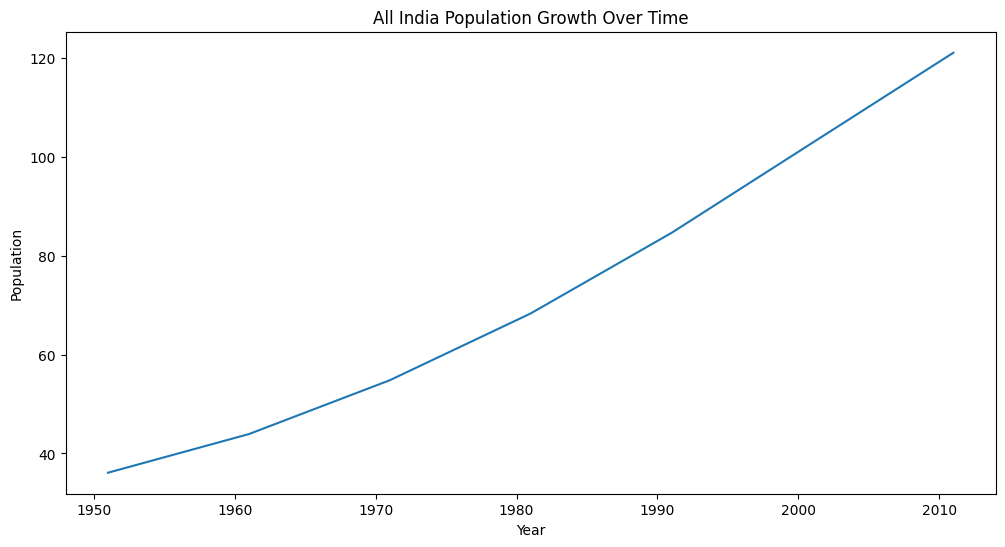

In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# Population of All India over the years 
all_india_pop = df_long[df_long['State'] == 'All India'] 
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='Year', y='Population', data=all_india_pop) 
plt.title('All India Population Growth Over Time') 
plt.show() 

Literacy Rate Trends

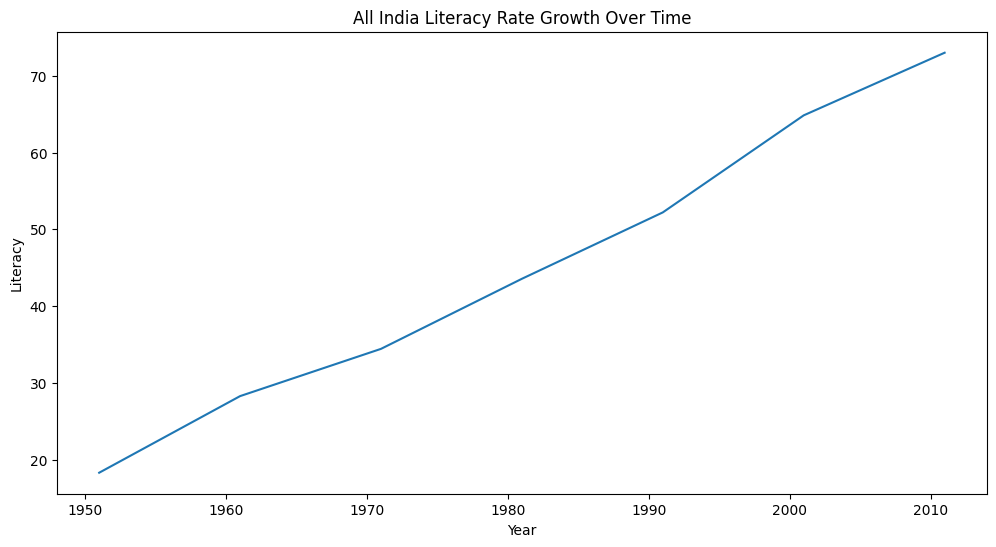

In [11]:
# Literacy Rate of All India over the years 
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='Year', y='Literacy', data=all_india_pop) 
plt.title('All India Literacy Rate Growth Over Time') 
plt.show() 

Urban vs. Rural Population Shift (Stacked Bar Chart)

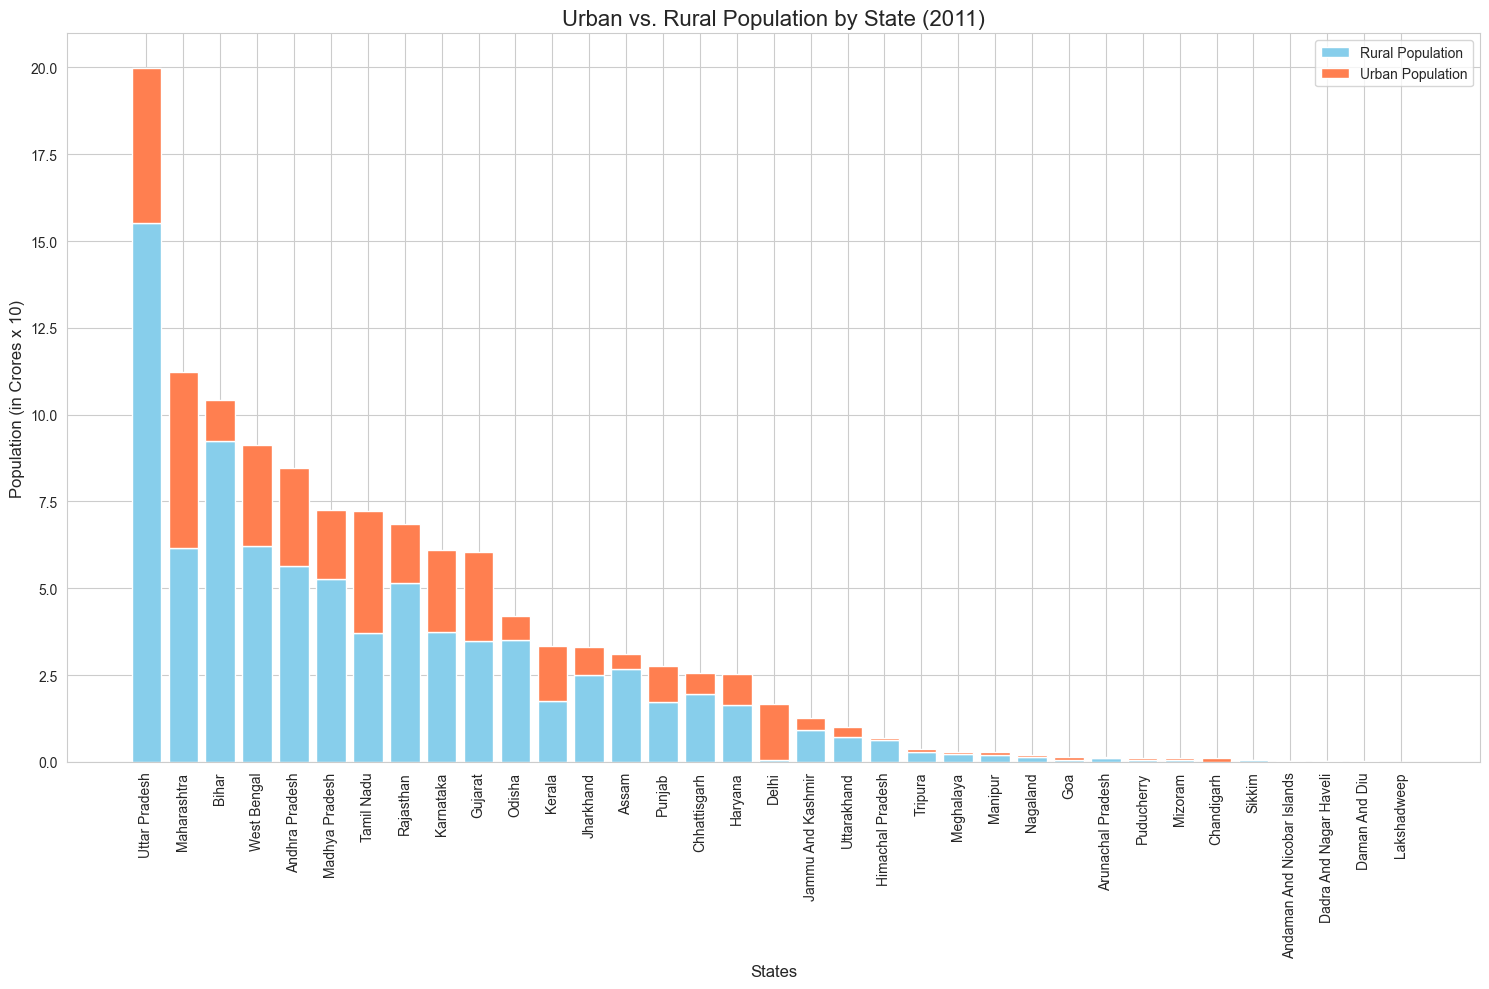

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have your DataFrame loaded
# df_long = pd.read_csv('final_df_long.csv')

# Filter the data for the year 2011 and exclude 'All India' to focus on states
df_2011 = df_long[(df_long['Year'] == 2011) & (df_long['State'] != 'All India')]

# Sort the data by total population for a more organized chart
df_2011_sorted = df_2011.sort_values('Population', ascending=False)

# Set the style for a visually appealing plot
sns.set_style("whitegrid")

# Create the stacked bar chart
plt.figure(figsize=(15, 10))

# Plot the rural population (bottom layer)
plt.bar(df_2011_sorted['State'], df_2011_sorted['Rural'], color='skyblue', label='Rural Population')

# Plot the urban population (top layer, it will be stacked on top of rural)
plt.bar(df_2011_sorted['State'], df_2011_sorted['Urban'], bottom=df_2011_sorted['Rural'], color='coral', label='Urban Population')

# Add labels and title for clarity
plt.xlabel('States', fontsize=12)
plt.ylabel('Population (in Crores x 10)', fontsize=12)
plt.title('Urban vs. Rural Population by State (2011)', fontsize=16)
plt.xticks(rotation=90) # Rotate state names for better readability
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

Sex Ratio Analysis Over Time (Line Chart)

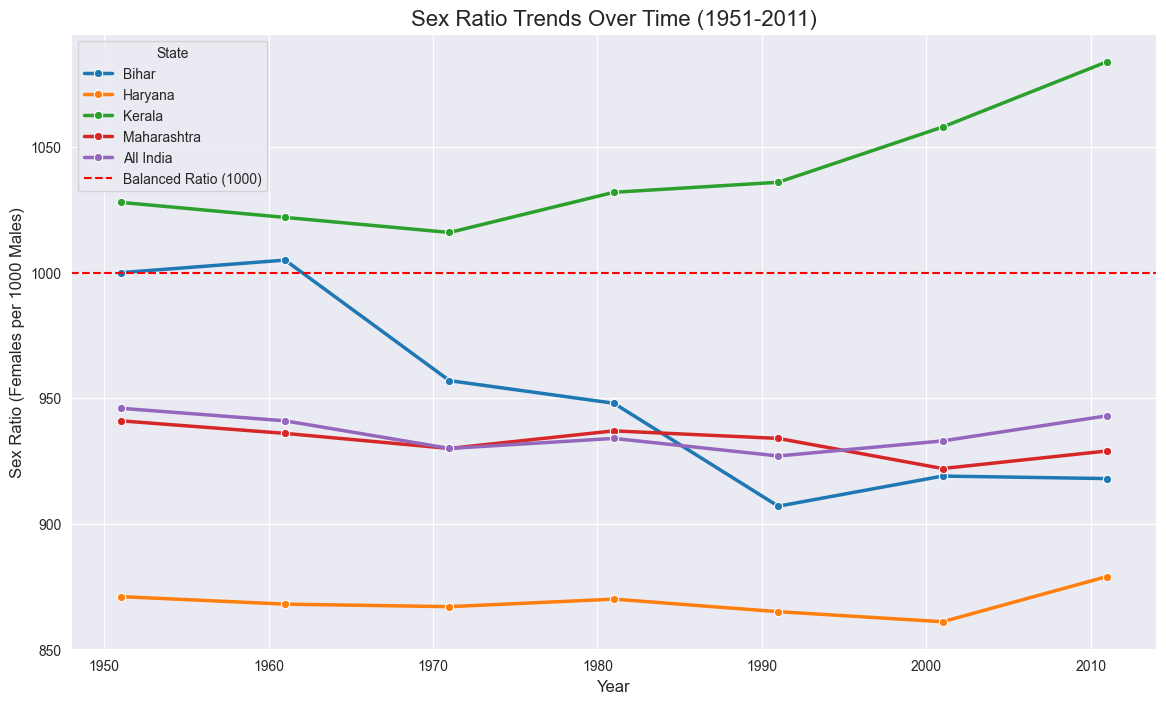

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have your DataFrame loaded
# df_long = pd.read_csv('final_df_long.csv')

# States to compare from different regions
# You can change these to any states you are interested in
selected_states = ['Kerala', 'Haryana', 'Bihar', 'Maharashtra', 'All India']

# Filter the DataFrame to include only the selected states
df_sex_ratio_states = df_long[df_long['State'].isin(selected_states)]

# Set the style
sns.set_style("darkgrid")

# Create the line plot
plt.figure(figsize=(14, 8))

# Use seaborn to create a line plot with different colors for each state
sns.lineplot(data=df_sex_ratio_states, x='Year', y='Sex_Ratio', hue='State', marker='o', linewidth=2.5)

# Add a horizontal line at the 1000 mark for reference (balanced ratio)
plt.axhline(1000, color='red', linestyle='--', label='Balanced Ratio (1000)')

# Add labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sex Ratio (Females per 1000 Males)', fontsize=12)
plt.title('Sex Ratio Trends Over Time (1951-2011)', fontsize=16)
plt.legend(title='State')

# Display the plot
plt.grid(True)
plt.show()

Advanced Analysis and Visualization

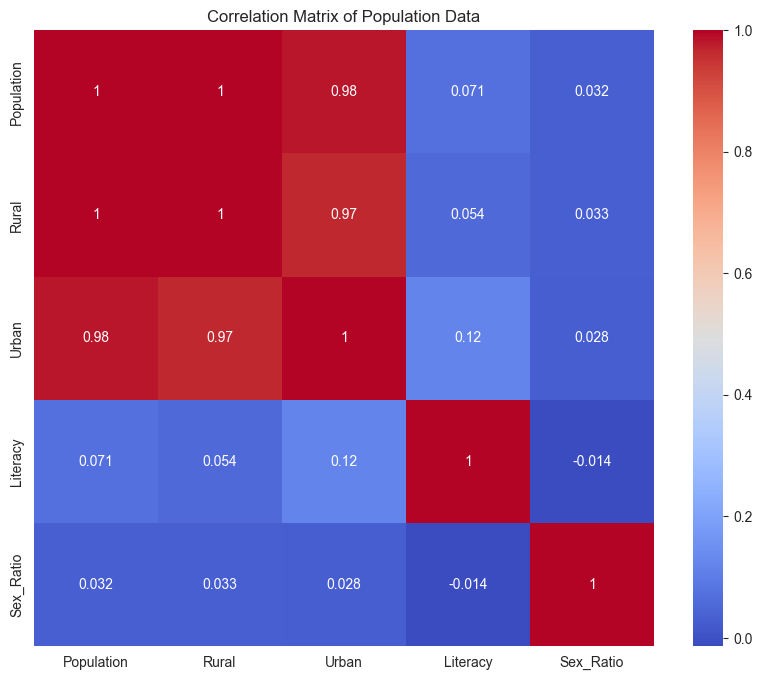

In [14]:
# Select numerical columns for correlation 
correlation_data = df_long[['Population', 'Rural', 'Urban', 'Literacy', 'Sex_Ratio']] 
correlation_matrix = correlation_data.corr() 

plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix of Population Data') 
plt.show() 

State-wise Deep Dive: Comparing Demographic Trajectories

In [15]:
# --- Code to Identify Key States ---

# Ensure your dataframe is loaded
# df_long = pd.read_csv('final_df_long.csv')

# --- 1. Find States by Population Growth (1951 vs 2011) ---
df_1951 = df_long[(df_long['Year'] == 1951) & (df_long['State'] != 'All India')][['State', 'Population']]
df_2011 = df_long[(df_long['Year'] == 2011) & (df_long['State'] != 'All India')][['State', 'Population']]

# Merge the 1951 and 2011 data
df_growth = pd.merge(df_1951, df_2011, on='State', suffixes=('_1951', '_2011'))

# Calculate the percentage growth
df_growth['Growth_Percentage'] = ((df_growth['Population_2011'] - df_growth['Population_1951']) / df_growth['Population_1951']) * 100
df_growth_sorted = df_growth.sort_values('Growth_Percentage', ascending=False)

print("--- States with Highest Population Growth (1951-2011) ---")
print(df_growth_sorted.head(3))
print("\n--- States with Lowest Population Growth (1951-2011) ---")
print(df_growth_sorted.tail(3))


# --- 2. Find States by Sex Ratio (in 2011) ---
df_sex_ratio_2011 = df_long[(df_long['Year'] == 2011) & (df_long['State'] != 'All India')].sort_values('Sex_Ratio', ascending=False)

print("\n--- States with Best Sex Ratios (2011) ---")
print(df_sex_ratio_2011[['State', 'Sex_Ratio']].head(3))
print("\n--- States with Worst Sex Ratios (2011) ---")
print(df_sex_ratio_2011[['State', 'Sex_Ratio']].tail(3))

--- States with Highest Population Growth (1951-2011) ---
                          State  Population_1951  Population_2011  \
0   Andaman And Nicobar Islands           0.0031           0.0381   
8                         Delhi           0.1744           1.6788   
23                     Nagaland           0.0213           0.1979   

    Growth_Percentage  
0         1129.032258  
8          862.614679  
23         829.107981  

--- States with Lowest Population Growth (1951-2011) ---
         State  Population_1951  Population_2011  Growth_Percentage
9          Goa           0.0547           0.1459         166.727605
16      Kerala           1.3549           3.3406         146.556941
29  Tamil Nadu           3.0119           7.2147         139.539825

--- States with Best Sex Ratios (2011) ---
          State  Sex_Ratio
231      Kerala       1084
240  Puducherry       1037
244  Tamil Nadu        996

--- States with Worst Sex Ratios (2011) ---
                      State  Sex_Ratio
219

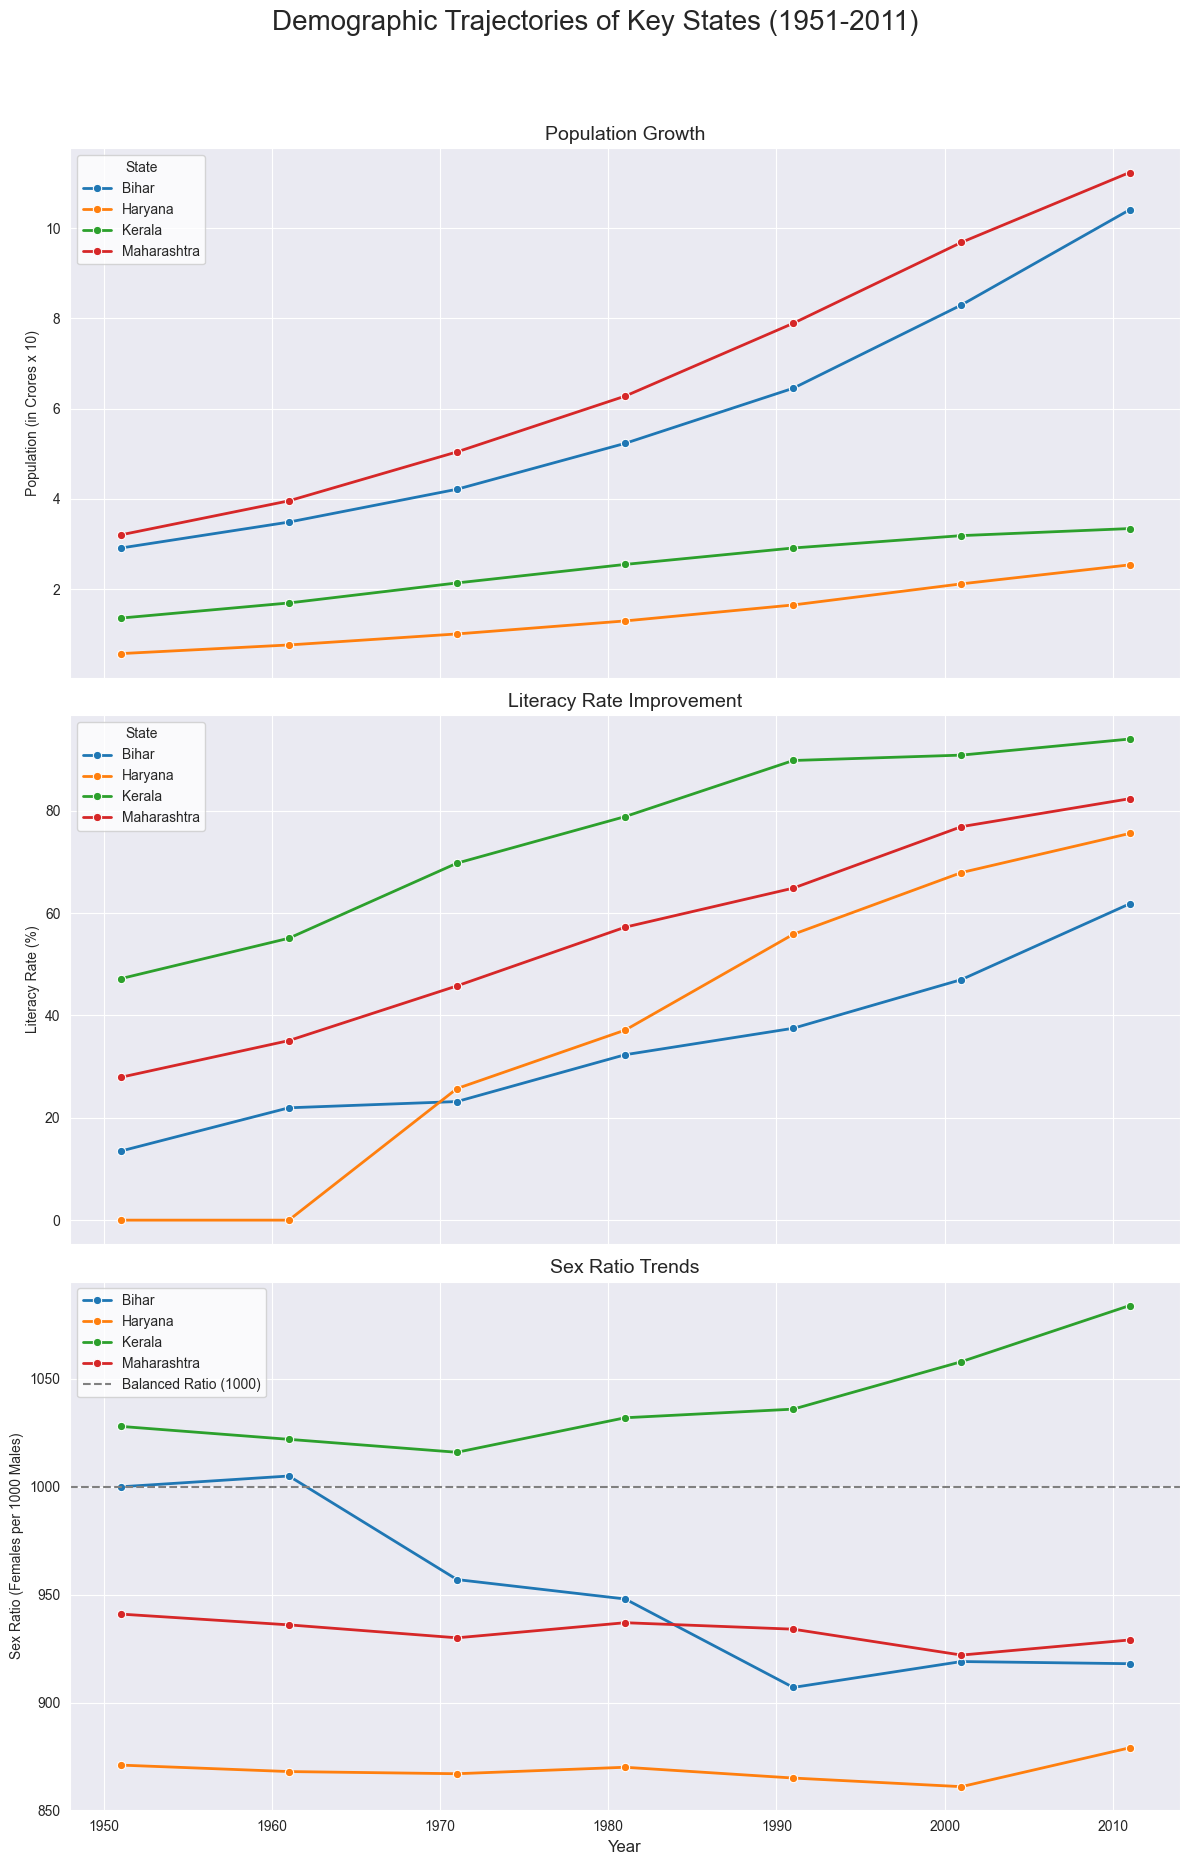

In [16]:
#Create Comparative Visualizations
# --- Code for State Trajectory Comparison ---

# List of states we selected for our deep dive
deep_dive_states = ['Bihar', 'Kerala', 'Haryana', 'Maharashtra']

# Filter the main dataframe for these states
df_deep_dive = df_long[df_long['State'].isin(deep_dive_states)]

# Set up the plots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 20), sharex=True)
sns.set_style("whitegrid")
fig.suptitle('Demographic Trajectories of Key States (1951-2011)', fontsize=20, y=0.93)

# --- Plot 1: Population Growth ---
sns.lineplot(ax=axes[0], data=df_deep_dive, x='Year', y='Population', hue='State', marker='o', linewidth=2)
axes[0].set_title('Population Growth', fontsize=14)
axes[0].set_ylabel('Population (in Crores x 10)')

# --- Plot 2: Literacy Rate Growth ---
sns.lineplot(ax=axes[1], data=df_deep_dive, x='Year', y='Literacy', hue='State', marker='o', linewidth=2)
axes[1].set_title('Literacy Rate Improvement', fontsize=14)
axes[1].set_ylabel('Literacy Rate (%)')

# --- Plot 3: Sex Ratio Trends ---
sns.lineplot(ax=axes[2], data=df_deep_dive, x='Year', y='Sex_Ratio', hue='State', marker='o', linewidth=2)
axes[2].set_title('Sex Ratio Trends', fontsize=14)
axes[2].set_ylabel('Sex Ratio (Females per 1000 Males)')
axes[2].axhline(1000, color='grey', linestyle='--', label='Balanced Ratio (1000)') # Add reference line
axes[2].legend()

# Display the plot
plt.xlabel('Year', fontsize=12)
plt.tight_layout(rect=[0, 0, 1, 0.9]) # Adjust layout to make space for the main title
plt.show()

Postgre connection

In [17]:
import pandas as pd
from sqlalchemy import create_engine

# Load the dataset you want to upload
df = pd.read_csv('final_df_long.csv')

# --- Best Practice: Clean column names for SQL ---
# Converts to lowercase and replaces spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

print("Cleaned column names for SQL:")
print(df.columns)

Cleaned column names for SQL:
Index(['state', 'year', 'population', 'rural', 'urban', 'literacy',
       'sex_ratio'],
      dtype='object')


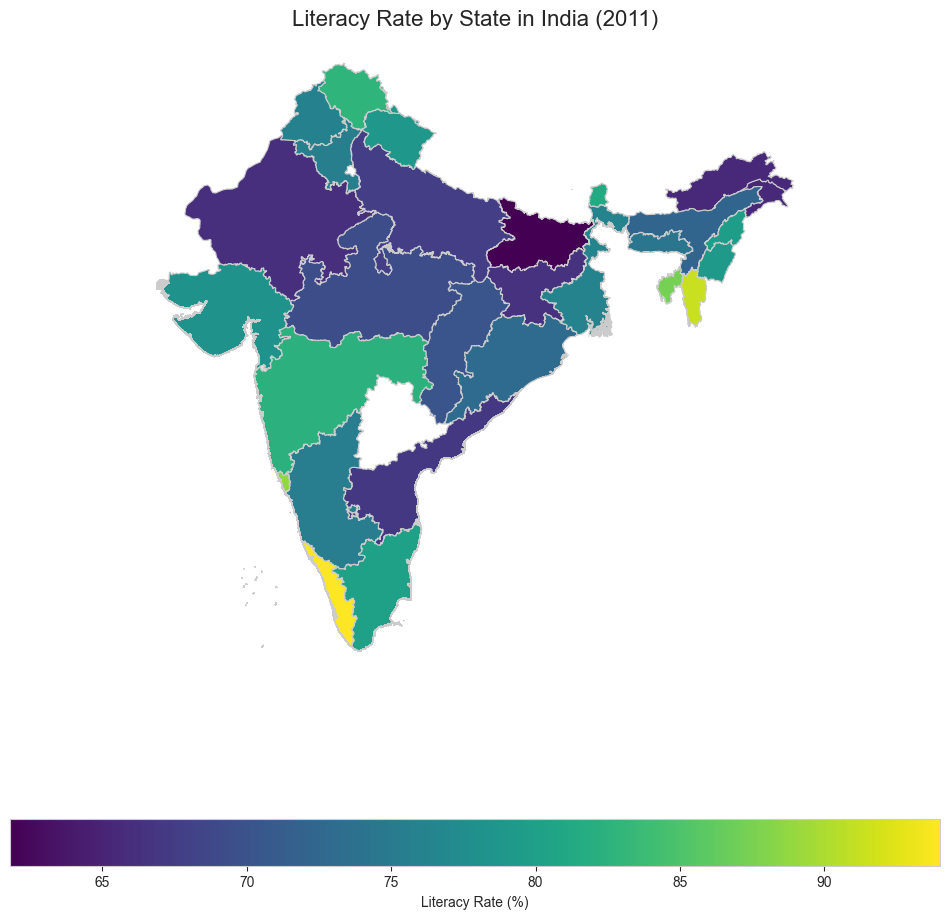

In [18]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Code to Create a Choropleth Map of Literacy Rates ---

# 1. Load your Indian population data for 2011
df_2011 = df_long[(df_long['Year'] == 2011) & (df_long['State'] != 'All India')]

# 2. Load the India states shapefile
#    IMPORTANT: Replace 'gadm41_IND_1.shp' with the actual name of your shapefile.
try:
    map_df = gpd.read_file('gadm41_IND_1.shp')
except Exception as e:
    print(f"Error loading shapefile: {e}")
    print("\nPlease make sure the shapefile (e.g., 'gadm41_IND_1.shp' and its related files) is in your project folder.")
    # Exit if the map can't be loaded
    map_df = None

if map_df is not None:
    # 3. Merge your data with the map data
    #    The column with state names in the shapefile might be 'NAME_1', 'STATE', etc.
    #    Use map_df.head() to find the correct column name and replace 'NAME_1' if needed.
    merged_df = map_df.set_index('NAME_1').join(df_2011.set_index('State'))

    # 4. Create the plot
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    ax.set_title('Literacy Rate by State in India (2011)', fontdict={'fontsize': '16', 'fontweight': '3'})
    
    # Remove the axes
    ax.set_axis_off()

    # Plot the map
    merged_df.plot(column='Literacy',
                   cmap='viridis',      # Colormap (you can choose others like 'plasma', 'coolwarm')
                   linewidth=0.8,
                   ax=ax,
                   edgecolor='0.8',
                   legend=True,
                   legend_kwds={'label': "Literacy Rate (%)",
                                'orientation': "horizontal"})
    plt.show()

Create the Database Connection and Load the Data

In [ ]:
# --- Database Connection Details ---
# Replace 'your_password' with the password you set during PostgreSQL installation.
db_user = 'postgres'
db_password = '1224' 
db_host = 'localhost'
db_port = '5432'
db_name = 'indian_population_db'

# Create the connection string
connection_string = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create the SQLAlchemy engine
try:
    engine = create_engine(connection_string)
    print("Successfully connected to the database.")
except Exception as e:
    print(f"Failed to connect to the database. Error: {e}")

# --- Load the DataFrame into a PostgreSQL Table ---
# We will name the table 'population_trends'
table_name = 'population_trends'

try:
    # Use the to_sql function to write the data
    df.to_sql(
        table_name,
        con=engine,
        if_exists='replace', # 'replace' drops the table first and recreates it. Useful for re-running the script.
                             # Use 'append' if you want to add data to an existing table.
        index=False        # Do not write the pandas DataFrame index as a column.
    )
    print(f"Successfully loaded data into the '{table_name}' table.")
except Exception as e:
    print(f"Failed to load data into the table. Error: {e}")

Successfully connected to the database.
Successfully loaded data into the 'population_trends' table.
